***
**Text classification by severity using Bert model**

**Description:** In this notebook we are doing the text classification of the sentiment based on the severity level.

Also comparing the results obtained by Bert model and the ChatGPT results.

***


In [1]:
import random
import torch

# Set random seed for Python and PyTorch
seed_value = 42

random.seed(seed_value)
torch.manual_seed(seed_value)

In [2]:
from transformers import pipeline

# Load the zero-shot classification pipeline
classifier1 = pipeline('sentiment-analysis',model="distilbert/distilbert-base-uncased-finetuned-sst-2-english") # for classifying text into either positive or negative sentiments
classifier2 = pipeline("zero-shot-classification", model="distilbert-base-uncased") # for classifying text based on severity into 3 categories: mild, moderate and severe

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


In [3]:
sentiment_labels = ["positive","negative"]
severity_labels = ["mild","moderate","severe"]

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np

df_true = pd.read_excel("/content/drive/MyDrive/Mental_health_prediction/testing_data_for_sentiment_analysis.xlsx")
list1 = df_true['label'].tolist()
list2 = df_true['severity'].tolist()

In [6]:
# Replace NaN values with empty string
list2_cleaned = [' ' if isinstance(x, float) and np.isnan(x) else x for x in list2]

In [7]:
y_true = [[item1, item2] for item1, item2 in zip(list1, list2_cleaned)]

In [8]:
y_true

[['negative', 'moderate'],
 ['negative', 'moderate'],
 ['negative', 'moderate'],
 ['negative', 'severe'],
 ['positive', ' '],
 ['negative', 'severe'],
 ['negative', 'severe'],
 ['negative', 'severe'],
 ['negative', 'severe'],
 ['negative', 'moderate'],
 ['negative', 'severe'],
 ['negative', 'severe'],
 ['positive', ' '],
 ['positive', ' '],
 ['positive', ' '],
 ['positive', ' '],
 ['positive', ' '],
 ['negative', 'severe'],
 ['negative', 'moderate'],
 ['negative', 'severe'],
 ['negative', 'moderate'],
 ['negative', 'moderate']]

In [9]:
# Prompt and candidate labels
prompts = df_true['text'].tolist()


In [10]:
len(prompts)

22

In [11]:
for text in prompts:
  print(text)

I know I need to deal with my depression. But I don't know how and I don't want to tell anyone.How can I deal with depression without telling anyone?
I feel like I'm constantly bombarded with images and messages on social media that make me feel inadequate and insecure.
I find myself comparing my body and appearance to others on social media, and it's making me feel self-conscious and unhappy with myself.
How do I make myself happy without the people who made me happy? Now that they’re gone, I feel sad. It’s been two months now but I seem to be unable to stay okay and independent.
Feeling a bit stressed about work, but overall doing okay
Feeling worthless and like a burden to everyone around me.
I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.   How can I change my feeling 

In [12]:
# Perform zero-shot classification for classifying the sentiment into either postive or negative
def sentiment_classify(text):
  predictions = classifier1(text, truncation=True)
  return predictions

# Perform zero-shot classification for classifying the sentiment based on severity: mild, moderate and severe
def severity_classify(text):
  result2 = classifier2(text, severity_labels)
  return result2

In [13]:
results_all = []

for text in prompts:
    results = []
    result = sentiment_classify(text)
    predicted_label = result[0]['label'].lower()

    results.append(predicted_label)

    if predicted_label == 'negative':
        severity_pred = severity_classify(text)
        severity = severity_pred['labels'][0]
        results.append(severity)
    else:
        results.append(" ")

    # Append the results list to results_all
    results_all.append(results)

In [14]:
severity_pred

{'sequence': "Feeling isolated and alone in my struggles with bipolar disorder. It's hard to reach out when I'm afraid of being judged.",
 'labels': ['severe', 'moderate', 'mild'],
 'scores': [0.3358977138996124, 0.33214110136032104, 0.3319612145423889]}

In [15]:
results_all

[['negative', 'severe'],
 ['negative', 'severe'],
 ['negative', 'severe'],
 ['negative', 'severe'],
 ['positive', ' '],
 ['negative', 'severe'],
 ['negative', 'severe'],
 ['negative', 'severe'],
 ['negative', 'severe'],
 ['negative', 'severe'],
 ['negative', 'severe'],
 ['negative', 'severe'],
 ['positive', ' '],
 ['positive', ' '],
 ['positive', ' '],
 ['positive', ' '],
 ['positive', ' '],
 ['negative', 'severe'],
 ['negative', 'severe'],
 ['negative', 'severe'],
 ['negative', 'severe'],
 ['negative', 'severe']]

In [16]:
y_pred = results_all

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

# Extract predicted labels and severity labels
y_pred_sentiment = [pred[0] for pred in y_pred]
y_pred_severity = [pred[1] for pred in y_pred]

# Extract predicted labels and severity labels
y_true_sentiment = [pred[0] for pred in y_true]
y_true_severity = [pred[1] for pred in y_true]

# Create confusion matrix for sentiment
cm_sentiment = confusion_matrix(y_true_sentiment, y_pred_sentiment, labels=sentiment_labels)

# Create confusion matrix for severity
cm_severity = confusion_matrix(y_true_severity, y_pred_severity, labels=severity_labels)

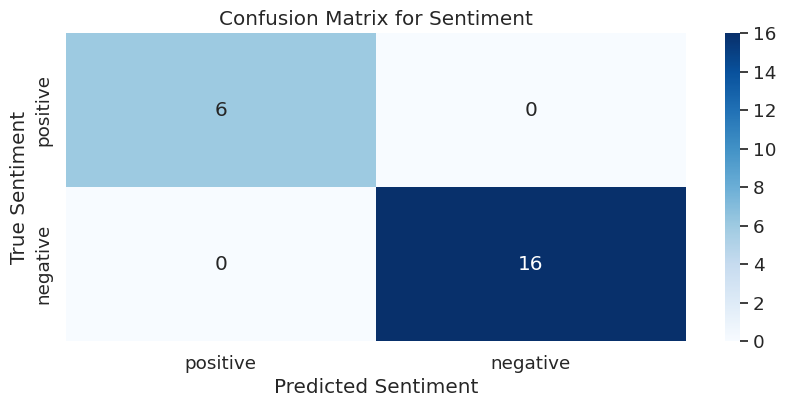

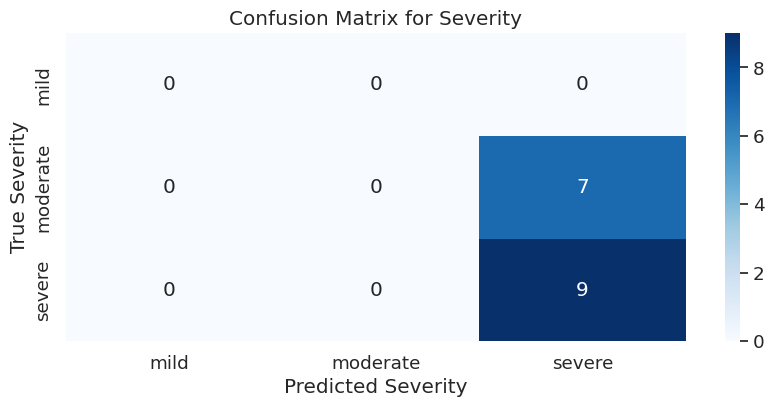

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix for sentiment
plt.figure(figsize=(10,4))
sns.set(font_scale=1.2)
sns.heatmap(cm_sentiment, annot=True, fmt='d', cmap='Blues', xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.title('Confusion Matrix for Sentiment')
plt.show()

# Plot confusion matrix for severity
plt.figure(figsize=(10,4))
sns.set(font_scale=1.2)
sns.heatmap(cm_severity, annot=True, fmt='d', cmap='Blues', xticklabels=severity_labels, yticklabels=severity_labels)
plt.xlabel('Predicted Severity')
plt.ylabel('True Severity')
plt.title('Confusion Matrix for Severity')
plt.show()

In [19]:
# Generate classification report
sentiment_report = classification_report(y_true_sentiment, y_pred_sentiment)
severity_report = classification_report(y_true_severity, y_pred_severity)
print(sentiment_report)
print(severity_report)

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        16
    positive       1.00      1.00      1.00         6

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

              precision    recall  f1-score   support

                   1.00      1.00      1.00         6
    moderate       0.00      0.00      0.00         7
      severe       0.56      1.00      0.72         9

    accuracy                           0.68        22
   macro avg       0.52      0.67      0.57        22
weighted avg       0.50      0.68      0.57        22



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
